In [1]:
!wget https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/tensorflow/helper_functions.py

--2024-02-08 15:07:59--  https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/tensorflow/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-08 15:07:59 (71.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
!wget https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/train.zip
!wget https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/validation.zip


--2024-02-08 15:10:00--  https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/train.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.208, 52.219.220.112, 52.219.120.224, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55561373 (53M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]  52.99M  83.3MB/s    in 0.6s    

2024-02-08 15:10:01 (83.3 MB/s) - ‘train.zip’ saved [55561373/55561373]

--2024-02-08 15:10:01--  https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/validation.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.208, 52.219.220.112, 52.219.120.224, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1620

In [4]:
from helper_functions import *

In [5]:
unzip_data("train.zip")
unzip_data("validation.zip")

In [40]:
import tensorflow as tf
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [28]:
def get_image_path(dir):
  image_path = []
  for root, dirs, files in os.walk(dir):
    for f in files:
      path = os.path.join(root, f)
      image_path.append(path)

  return image_path


In [45]:
train_data_path = get_image_path("train_combined/images")
train_mask_path = get_image_path("train_combined/masks")

validation_data_path = get_image_path("validation/images")
validation_mask_path = get_image_path('validation/masks')

(-0.5, 255.5, 255.5, -0.5)

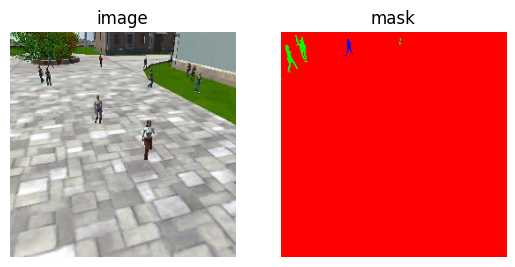

In [37]:

index = random.randint(0, len(train_data_path)-1)
train_img = mpimg.imread(train_data_path[index])
train_msk = mpimg.imread(train_mask_path[index])

plt.subplot(1, 2, 1)
plt.imshow(train_img)
plt.title('image')
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(train_msk)
plt.title('mask')
plt.axis(False)

In [50]:
def load_images(images_path):
  images = []
  for path in tqdm(images_path):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=3, dtype=tf.uint8)
    images.append(image)

  return images


In [51]:
train_data = load_images(train_data_path)
train_mask = load_images(train_mask_path)
validation_data = load_images(validation_data_path)
validation_mask = load_images(validation_mask_path)

100%|██████████| 1184/1184 [00:00<00:00, 1186.39it/s]


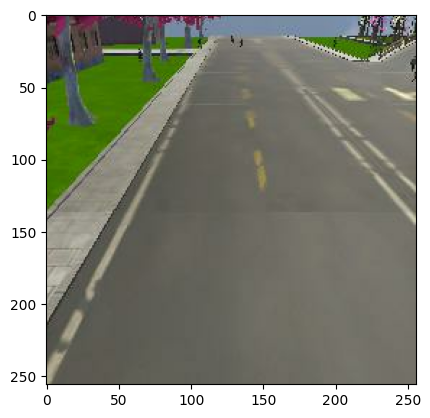

In [52]:
plt.imshow(train_data[0])